### Model comparison
Compare model performance (SVC, LR, RF) with and without oversampling.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import pickle

%matplotlib inline
plt.style.use('seaborn-pastel')

import seaborn as sns
sns.set(style="whitegrid")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve

%run evaluation_functions.py

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [39]:
# with open('pickles/appt.pickle','rb') as read_file:
with open('pickles/appt_v2.pickle','rb') as read_file:
    appt = pickle.load(read_file)
    
appt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25453 entries, 1 to 39983
Data columns (total 36 columns):
PatientId              25453 non-null float64
AppointmentID          25453 non-null int64
Gender                 25453 non-null object
ScheduledDay           25453 non-null object
AppointmentDay         25453 non-null object
Age                    25453 non-null int64
Neighbourhood          25453 non-null object
Scholarship            25453 non-null int64
Hipertension           25453 non-null int64
Diabetes               25453 non-null int64
Alcoholism             25453 non-null int64
Handcap                25453 non-null int64
SMS_received           25453 non-null int64
No_show                25453 non-null object
No_show_num            25453 non-null int64
SchedDay               25453 non-null datetime64[ns]
SchedTime              25453 non-null object
SchedDayofWeek         25453 non-null object
ApptDay                25453 non-null datetime64[ns]
ApptDayofWeek          25453

In [40]:
#Set features
## run for appt_v2
feature_cols = ['Gender','Age2','Neighbourhood2','Scholarship','Hipertension','Diabetes','Alcoholism',
                'Handcap_bin','SMS_received','SchedDayofWeek','ApptDayofWeek','DayDiff2',
                'no_show_rate2','Reschedule','Follow_up']
## run for appt
# feature_cols = ['Gender','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received',
#                 'ApptDayofWeek','SchedDayofWeek','Neighbourhood','DayDiff']

a_X = appt[feature_cols]

## run for appt_v2
a_X = pd.get_dummies(a_X, columns = ['Gender','Neighbourhood2','SchedDayofWeek','ApptDayofWeek'])
## run for appt
# a_X = pd.get_dummies(a_X, columns = ['Gender','Neighbourhood','ApptDayofWeek','SchedDayofWeek'])

## run for appt_v2
a_X.drop(columns=['Gender_F','Neighbourhood2_OTHER','SchedDayofWeek_Monday','ApptDayofWeek_Monday'],inplace=True)
## run for appt
# a_X.drop(columns=['Gender_F','Neighbourhood_VILA RUBIM','SchedDayofWeek_Monday','ApptDayofWeek_Monday'],inplace=True)

X_cols = np.array(a_X.columns)
a_X.info()
# a_X.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25453 entries, 1 to 39983
Data columns (total 85 columns):
Age2                                  25453 non-null int64
Scholarship                           25453 non-null int64
Hipertension                          25453 non-null int64
Diabetes                              25453 non-null int64
Alcoholism                            25453 non-null int64
Handcap_bin                           25453 non-null int64
SMS_received                          25453 non-null int64
DayDiff2                              25453 non-null int64
no_show_rate2                         25453 non-null float64
Reschedule                            25453 non-null int64
Follow_up                             25453 non-null int64
Gender_M                              25453 non-null uint8
Neighbourhood2_ANDORINHAS             25453 non-null uint8
Neighbourhood2_BARRO VERMELHO         25453 non-null uint8
Neighbourhood2_BELA VISTA             25453 non-null uint8
Neig

In [41]:
#split into training and test sets
X, y = a_X, appt['No_show_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10, stratify = y)

### Linear SVC

In [42]:
# linearsvc = LinearSVC()
# linearsvc.fit(X_train,y_train)
# linearsvc.predict(X_test)

### SVC

In [43]:
# SVC = SVC()
# SVC.fit(X_train,y_train)
# y_pred_SVC = SVC.predict(X_test)

In [44]:
# print_scores(y_test,y_pred_SVC)

### Decision Tree Classifier

In [45]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train,y_train)
y_pred_DTC = decisiontree.predict(X_test)

In [46]:
print_scores(y_test,y_pred_DTC)

Accuracy score: 0.6484915147705845
F1 score: 0.3650298041441952
Precision (true + / all predicted +): 0.36954022988505747
Recall (true + / all actual +): 0.3606281547952888


ROC AUC score =  0.5601043863905182


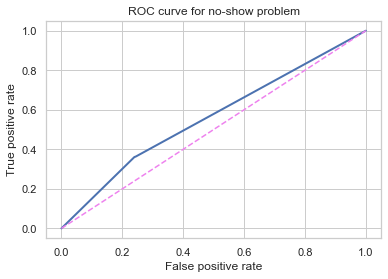

In [47]:
# Graph ROC AUC 
fpr, tpr, thresholds = roc_curve(y_test, decisiontree.predict_proba(X_test)[:,1])
graph_roc_auc(fpr,tpr)
print("ROC AUC score = ", roc_auc_score(y_test, decisiontree.predict_proba(X_test)[:,1]))

more balanced than logistic regression but AUC is worse

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(X_train,y_train)
y_pred_RFC = RFC.predict(X_test)

In [49]:
print_scores(y_test,y_pred_RFC)

Accuracy score: 0.725801382778127
F1 score: 0.3196881091617934
Precision (true + / all predicted +): 0.5242966751918159
Recall (true + / all actual +): 0.22994952327537857


ROC AUC score =  0.654671267101808


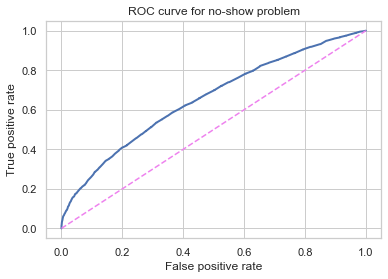

In [50]:
# Graph ROC AUC 
fpr, tpr, thresholds = roc_curve(y_test, RFC.predict_proba(X_test)[:,1])
graph_roc_auc(fpr,tpr)
print("ROC AUC score = ", roc_auc_score(y_test, RFC.predict_proba(X_test)[:,1]))

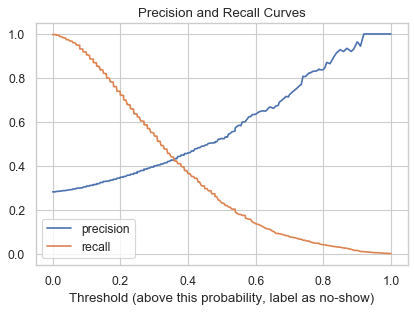

In [51]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, RFC.predict_proba(X_test)[:,1] )
graph_prec_recall_curves(threshold_curve,precision_curve,recall_curve)

#### How does the n_estimator count affect recall?

In [52]:
estimators = range(1,100)
recall_list = []
precision_list = []
accuracy_list = []
f1_list = []

for e in estimators:
    RFC = RandomForestClassifier(n_estimators=e)
    RFC.fit(X_train,y_train)
    recall_list.append(recall_score(y_test,RFC.predict(X_test)))
    precision_list.append(precision_score(y_test,RFC.predict(X_test)))
    accuracy_list.append(accuracy_score(y_test,RFC.predict(X_test)))
    f1_list.append(f1_score(y_test,RFC.predict(X_test)))

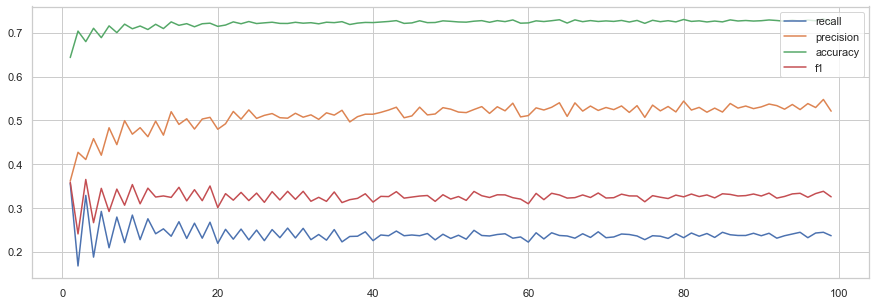

In [53]:
plt.figure(figsize=(15,5))
plt.plot(estimators,recall_list,label='recall')
plt.plot(estimators,precision_list,label='precision')
plt.plot(estimators,accuracy_list,label='accuracy')
plt.plot(estimators,f1_list,label='f1')
plt.legend(loc='upper right');

### Test oversampling on RF

In [54]:
# Now add some random oversampling of the minority classes
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_sample(X_train,y_train)
Counter(y_resampled)

Counter({0: 13739, 1: 13739})

In [55]:
RFC2 = RandomForestClassifier(n_estimators=100)
RFC2.fit(X_resampled,y_resampled)
y_pred_RFC2 = RFC2.predict(X_test)

In [56]:
print_scores(y_test,y_pred_RFC2)

Accuracy score: 0.7033312382149591
F1 score: 0.3874107722258273
Precision (true + / all predicted +): 0.45958429561200925
Recall (true + / all actual +): 0.33482893998878294


In [57]:
#SMOTE
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X_train,y_train)
Counter(y_smoted)

Counter({0: 13739, 1: 13739})

In [58]:
RFC3 = RandomForestClassifier(n_estimators=100)
RFC3.fit(X_resampled,y_resampled)
y_pred_RFC3 = RFC3.predict(X_test)
print_scores(y_test,y_pred_RFC3)

Accuracy score: 0.7047454431175362
F1 score: 0.39484702093397744
Precision (true + / all predicted +): 0.4636913767019667
Recall (true + / all actual +): 0.34380257992148067


In [59]:
#ADAYSN
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN(random_state=42).fit_sample(X_train,y_train)
Counter(y_adasyn)

Counter({0: 13739, 1: 13132})

In [60]:
RFC4 = RandomForestClassifier(n_estimators=100)
RFC4.fit(X_resampled,y_resampled)
y_pred_RFC4 = RFC4.predict(X_test)
print_scores(y_test,y_pred_RFC4)

Accuracy score: 0.7028598365807668
F1 score: 0.3894091055860511
Precision (true + / all predicted +): 0.4589041095890411
Recall (true + / all actual +): 0.3381940549635446


no real differences in performance by oversampling method - use random overseampling

### Test oversampling w/ LR

In [61]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_resampled,y_resampled)
y_pred_LR = LR.predict(X_test)
print_scores(y_test,y_pred_LR)

Accuracy score: 0.6407919547454431
F1 score: 0.45752254390128144
Precision (true + / all predicted +): 0.3965446318387495
Recall (true + / all actual +): 0.5406618059450364


ROC AUC score =  0.646547169947611


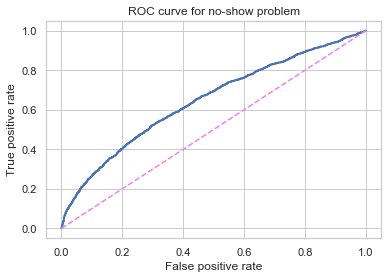

In [62]:
# Graph ROC AUC 
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
graph_roc_auc(fpr,tpr)
print("ROC AUC score = ", roc_auc_score(y_test, LR.predict_proba(X_test)[:,1]))

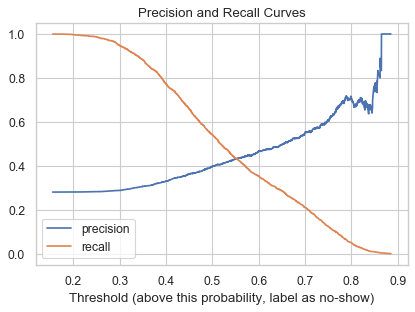

In [63]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, LR.predict_proba(X_test)[:,1] )
graph_prec_recall_curves(threshold_curve,precision_curve,recall_curve)

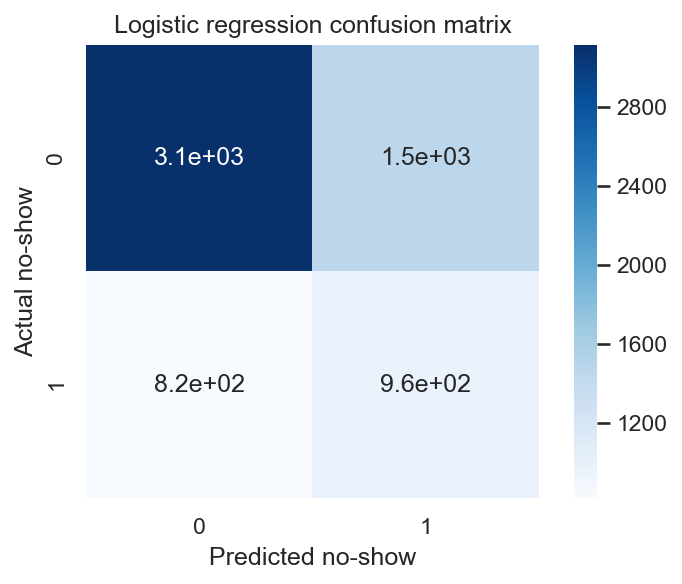

In [64]:
logit_confusion = confusion_matrix(y_test, y_pred_LR)
graph_conf_matrix(logit_confusion);

#### Regular LR

In [65]:
LR2 = LogisticRegression(solver='liblinear')
LR2.fit(X_train,y_train)
y_pred_LR2 = LR2.predict(X_test)
print_scores(y_test,y_pred_LR2)

Accuracy score: 0.7353865493400377
F1 score: 0.28401360544217685
Precision (true + / all predicted +): 0.5869947275922671
Recall (true + / all actual +): 0.1873247335950645


### Model comparisons

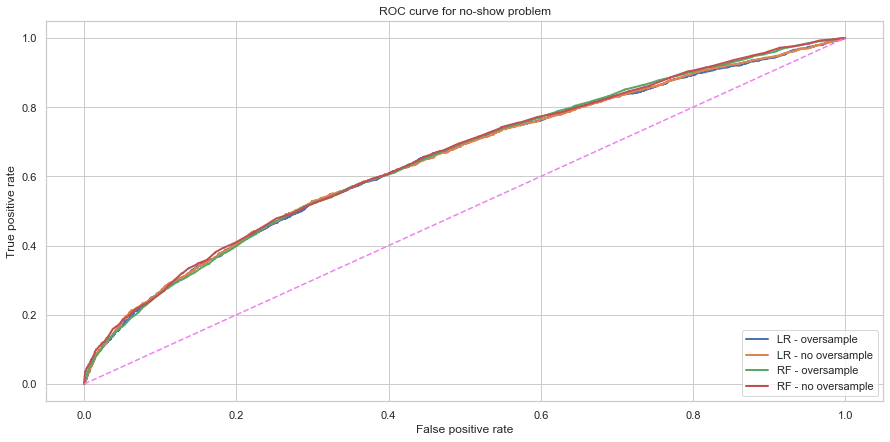

In [66]:
# Compare ROCs for:
fpr1, tpr1, thresholds1 = roc_curve(y_test, LR.predict_proba(X_test)[:,1]) # LR - oversampling
fpr2, tpr2, thresholds1 = roc_curve(y_test, LR2.predict_proba(X_test)[:,1]) # LR - no oversampling
fpr3, tpr3, thresholds1 = roc_curve(y_test, RFC2.predict_proba(X_test)[:,1]) # RF - oversampling
fpr4, tpr4, thresholds1 = roc_curve(y_test, RFC.predict_proba(X_test)[:,1]) # RF - no oversampling

plt.figure(figsize=(15,7))
plt.plot(fpr1, tpr1,lw=2,label='LR - oversample')
plt.plot(fpr2, tpr2,lw=2,label='LR - no oversample')
plt.plot(fpr3, tpr3,lw=2,label='RF - oversample')
plt.plot(fpr4, tpr4,lw=2,label='RF - no oversample')
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for no-show problem');

In [67]:
print("LR Oversampling - ROC AUC score = ", roc_auc_score(y_test, LR.predict_proba(X_test)[:,1]))
print("LR No Oversampling - ROC AUC score = ", roc_auc_score(y_test, LR2.predict_proba(X_test)[:,1]))
print("RF Oversampling - ROC AUC score = ", roc_auc_score(y_test, RFC2.predict_proba(X_test)[:,1]))
print("RF No Oversampling - ROC AUC score = ", roc_auc_score(y_test, RFC.predict_proba(X_test)[:,1]))

LR Oversampling - ROC AUC score =  0.646547169947611
LR No Oversampling - ROC AUC score =  0.6475300391543847
RF Oversampling - ROC AUC score =  0.6504686075027888
RF No Oversampling - ROC AUC score =  0.6536223468316242


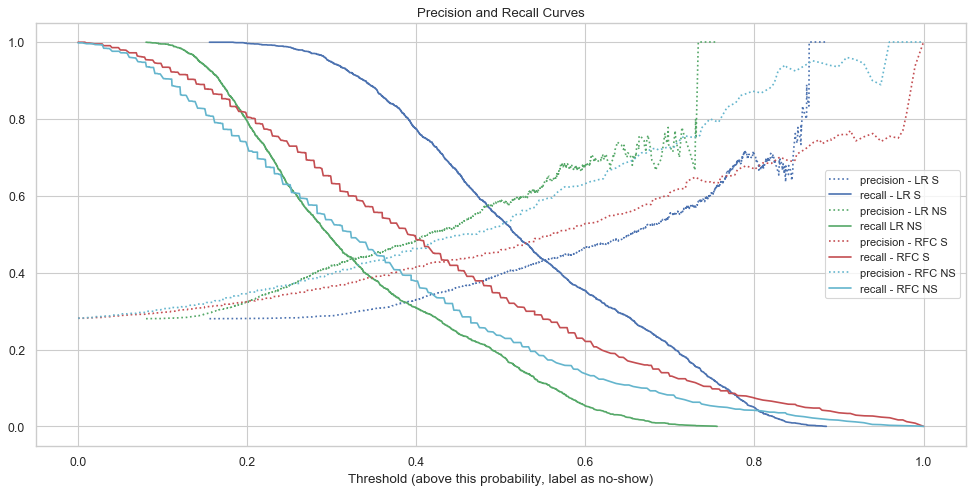

In [68]:
# Compare Precision/Recall curves
precision_curve1, recall_curve1, threshold_curve1 = precision_recall_curve(y_test, LR.predict_proba(X_test)[:,1] )
precision_curve2, recall_curve2, threshold_curve2 = precision_recall_curve(y_test, LR2.predict_proba(X_test)[:,1] )
precision_curve3, recall_curve3, threshold_curve3 = precision_recall_curve(y_test, RFC2.predict_proba(X_test)[:,1] )
precision_curve4, recall_curve4, threshold_curve4 = precision_recall_curve(y_test, RFC.predict_proba(X_test)[:,1] )

plt.figure(dpi=80,figsize=(15,7))
plt.plot(threshold_curve1, precision_curve1[1:],label='precision - LR S',color='b',linestyle=':')
plt.plot(threshold_curve1, recall_curve1[1:], label='recall - LR S',color='b')
plt.plot(threshold_curve2, precision_curve2[1:],label='precision - LR NS',color='g',linestyle=':')
plt.plot(threshold_curve2, recall_curve2[1:], label='recall LR NS',color='g')
plt.plot(threshold_curve3, precision_curve3[1:],label='precision - RFC S',color='r',linestyle=':')
plt.plot(threshold_curve3, recall_curve3[1:], label='recall - RFC S',color='r')
plt.plot(threshold_curve4, precision_curve4[1:],label='precision - RFC NS',color='c',linestyle=':')
plt.plot(threshold_curve4, recall_curve4[1:], label='recall - RFC NS',color='c')
plt.legend(loc='center right',fontsize='small')
plt.xlabel('Threshold (above this probability, label as no-show)');
plt.title('Precision and Recall Curves');